In [1]:
import numpy as np

In [2]:
k = -15
g_args = (k,)

def g(y, k): 
    return np.exp(k*y) - 0.5

In [3]:
delta_y = 0.0001
y0 = 0.0
y1 = y0 + delta_y
thres = 1e-10

# dg0 = -15*np.exp(-15*y0)


# if g(y0) > 0:
#     y1 = y0 + (-dg0)*delta_y
# else:
#     y1 = y0 + (dg0)*delta_y

# assert (g(y0) * g(y1)) > 0
# y1 = y0 + delta_y * (-15*np.exp(-15*y0))

In [4]:
def fzero_secant(y0, y1, g, thres, g_args=()):
#     _y_list = [y0, y1]
#     _y_err = _y_list[-1] - _y_list[-2]
    y_i_1, y_i_2 = y1, y0 # _y_list[-1], _y_list[-2]
    g_y_i_1, g_y_i_2 = g(y_i_1, *g_args), g(y_i_2, *g_args)
    while g_y_i_1 > thres:
        print("y_i_2: {} / y_i_1: {}".format(y_i_2,y_i_1))
#         g_y_i_2, g_y_i_1 = g(y_i_2, *g_args), g(y_i_1, *g_args)
        print("g_y_i_2: {} / g_y_i_1: {}".format(g_y_i_2, g_y_i_1))
        y_i = (y_i_2 * g_y_i_1 - y_i_1 * g_y_i_2) / (g_y_i_1 - g_y_i_2)
#         _y_list.append(y_i)
#         _y_err = _y_list[-1] - _y_list[-2]
        y_i_2 = y_i_1
        y_i_1 = y_i
        g_y_i_2 = g_y_i_1
        g_y_i_1 = g(y_i, *g_args)
#         if g_y_i_1 < thres: break
        
    return y_i_1

In [5]:
y_at_zero = fzero_secant(y0, y1, g, thres, g_args)

y_i_2: 0.0 / y_i_1: 0.0001
g_y_i_2: 0.5 / g_y_i_1: 0.4985011244377109
y_i_2: 0.0001 / y_i_1: 0.03335833958333335
g_y_i_2: 0.4985011244377109 / g_y_i_1: 0.10630319651567044
y_i_2: 0.03335833958333335 / y_i_1: 0.04237283853095337
g_y_i_2: 0.10630319651567044 / g_y_i_1: 0.029621553249378985
y_i_2: 0.04237283853095337 / y_i_1: 0.045855072990458996
g_y_i_2: 0.029621553249378985 / g_y_i_1: 0.002667633911595413
y_i_2: 0.045855072990458996 / y_i_1: 0.046199710318184525
g_y_i_2: 0.002667633911595413 / g_y_i_1: 7.576863389469057e-05
y_i_2: 0.046199710318184525 / y_i_1: 0.04620978518578491
g_y_i_2: 7.576863389469057e-05 / g_y_i_1: 2.0138662637503302e-07


In [6]:
g(y_at_zero, *g_args)

1.5257239915911214e-11

In [7]:
def dydt(t, y):
    return -15*y

In [8]:
def gg(y_next, y_n, h, dydt, t):
    return y_next - y_n - h * dydt(t+h,y_next)

In [9]:
y_0 = 1.0
t_0 = 0.0
h = 0.01

In [10]:
N_t = 10
y_arr = np.empty((N_t,), dtype=float)
t_arr = t_0 + np.arange(N_t) * h

In [11]:
delta_y = 0.0001  # may vary from the magnitude of v or small rho

y_arr[0] = y_0
for t_idx in range(N_t-1):
    y_n0 = y_arr[t_idx]
    gg_args = (y_n0, h, dydt, t_arr[t_idx])
    y_arr[t_idx+1] = fzero_secant(y_n0, y_n0+delta_y, gg, thres, gg_args)

y_i_2: 1.0 / y_i_1: 1.0001
g_y_i_2: 0.15 / g_y_i_1: 0.150115
y_i_2: 0.8695652173914198 / y_i_1: 0.8696652173914198
g_y_i_2: 0.13043478260871297 / g_y_i_1: 0.13054978260871294
y_i_2: 0.7561436672968804 / y_i_1: 0.7562436672968804
g_y_i_2: 0.11342155009453206 / g_y_i_1: 0.11353655009453205
y_i_2: 0.6575162324321427 / y_i_1: 0.6576162324321427
g_y_i_2: 0.09862743486482142 / g_y_i_1: 0.09874243486482141
y_i_2: 0.5717532455931781 / y_i_1: 0.5718532455931781
g_y_i_2: 0.0857629868389767 / g_y_i_1: 0.0858779868389767
y_i_2: 0.49717673529838685 / y_i_1: 0.49727673529838684
g_y_i_2: 0.07457651029475802 / g_y_i_1: 0.07469151029475801
y_i_2: 0.4323275959116355 / y_i_1: 0.4324275959116355
g_y_i_2: 0.06484913938674533 / g_y_i_1: 0.06496413938674532
y_i_2: 0.37593703992317573 / y_i_1: 0.3760370399231757
g_y_i_2: 0.056390555988476365 / g_y_i_1: 0.05650555598847634
y_i_2: 0.3269017738462228 / y_i_1: 0.3270017738462228
g_y_i_2: 0.049035266076933426 / g_y_i_1: 0.04915026607693341


In [12]:
import matplotlib.pyplot as plt

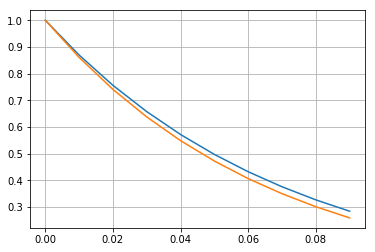

In [13]:
fig, ax = plt.subplots()
ax.plot(t_arr, y_arr)
ax.plot(t_arr, np.exp(-15*t_arr))